In [1]:
from tcsim.system import*
from tcsim.visualization import*
from tcsim.gates import*

The picked up Berry Phase is equal to the enclosed area times 2. This means, with ECD(1), we expect a complete oscillation for D(pi).

### 1. Use Displacement Operators direclty applied to the States

c:\\Users\\jonat\\Desktop\\Coding\\qcrew\\TransmonCavity\Visualization.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(


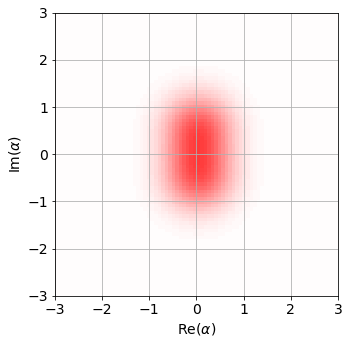

In [8]:
plot_wigner(qt.ptrace(CD_ideal_operator(superpos,  1j*1),1))

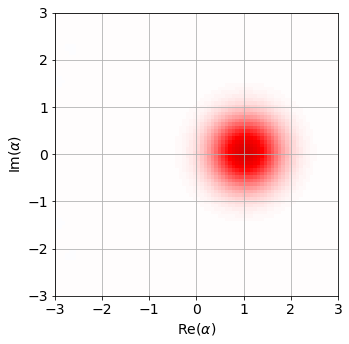

In [3]:
plot_wigner(qt.ptrace(D_ideal_operator(vac,1),1))

1. Apply displacement Operrators directly to the states

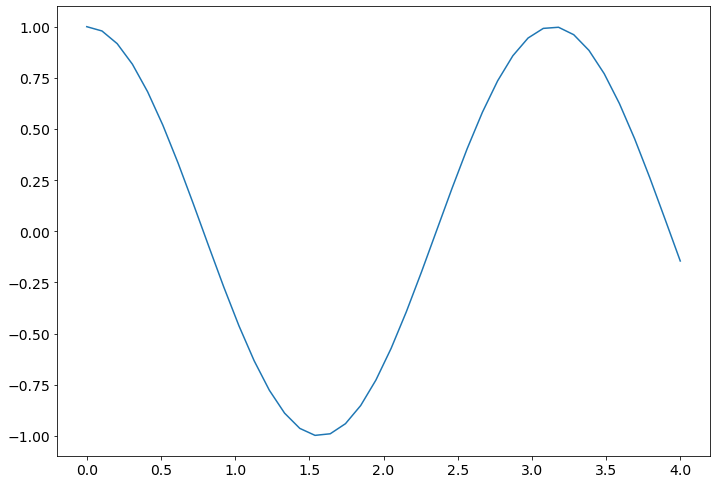

In [10]:
def berry_phase(alpha_list, beta):
    expect_values = []
    for alpha in alpha_list:
        psi1 = CD_ideal_operator(superpos,  1j)
        psi2 = D_ideal_operator(psi1, alpha)
        psi3 = CD_ideal_operator(psi2 , -1j)
        psi4 = D_ideal_operator(psi3, -alpha,)
        expect_values.append(qt.expect(qt.sigmax(),qt.ptrace(psi4,0)))   
    return expect_values


alpha_list = np.linspace(0,4,40)
phases = berry_phase(alpha_list,1)
plt.plot(alpha_list, phases)

### 2. Use Ideal Hamiltonians for time evolution - currently doesnt work?

c:\Users\jonat\Desktop\Coding\qcrew\TransmonCavity\Visualization.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(


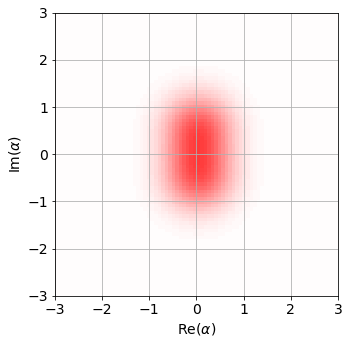

In [2]:
t_displace = np.linspace(0,1,10)
plot_wigner(qt.ptrace(CD_ideal(superpos, t_displace,  1j),1))

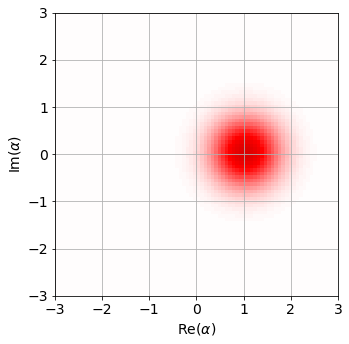

In [3]:
t_displace = np.linspace(0,1,10)
plot_wigner(qt.ptrace(D_ideal(vac, t_displace,  1),1))

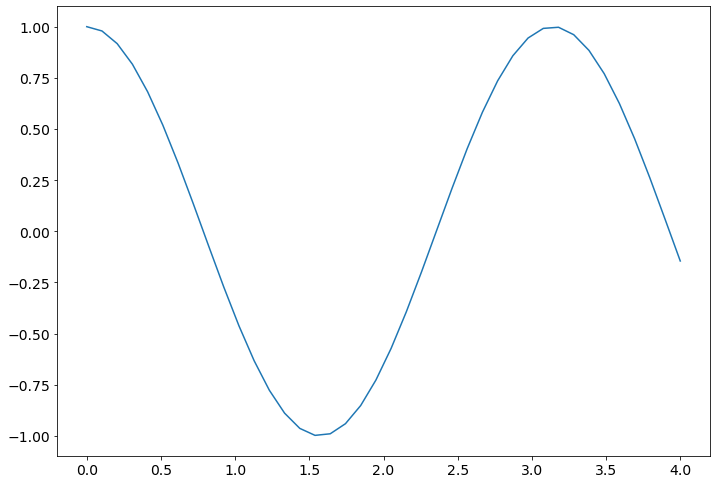

In [7]:
def berry_phase(alpha_list, beta):
    expect_values = []
    for alpha in alpha_list:
        psi1 = CD_ideal(superpos,t_displace, -1j*1)
        psi2 = D_ideal(psi1, t_displace,  alpha)
        psi3 = CD_ideal(psi2,t_displace , 1j*1)
        psi4 = D_ideal(psi3, t_displace,  -alpha)
        expect_values.append(qt.expect(qt.sigmax(),qt.ptrace(psi4,0)))
        
    return expect_values

alpha_list = np.linspace(0,4,40)
phases = berry_phase(alpha_list,1)
plt.plot(alpha_list, phases)

### 3. Like experiment, ECD split up into displacements and wait

Now, we can put this to test by using single displacement = pi to calibrate ECD(1)

c:\Users\jonat\Desktop\Coding\qcrew\TransmonCavity\Visualization.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(


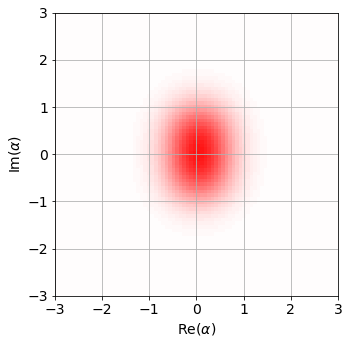

In [8]:
t_displace = np.linspace(0,0.02,10)
t_wait = np.linspace(0,0.03,10)
plot_wigner(qt.ptrace(ECD_exp(superpos ,t_displace , t_wait , 4),1))

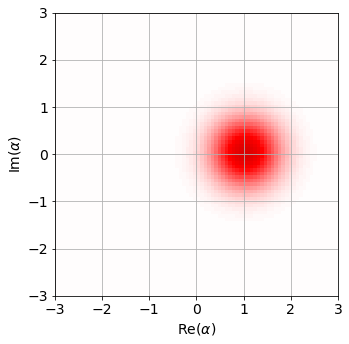

In [9]:
plot_wigner(qt.ptrace(D_ideal(vac , t_displace, epsilon = EPSILON),1))

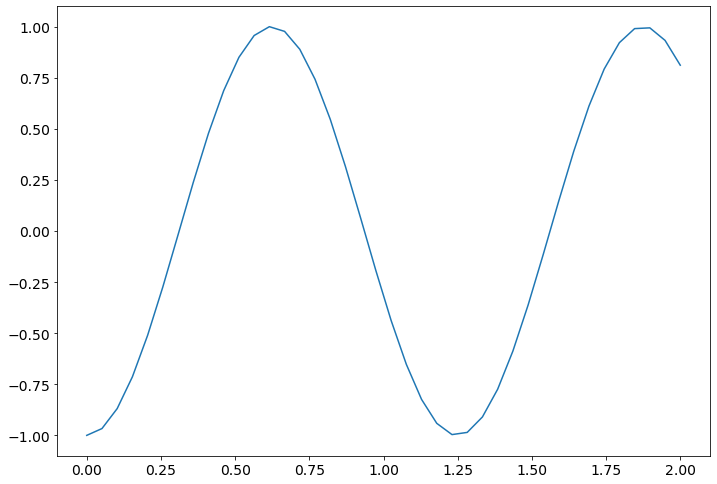

In [13]:
t_displace = np.linspace(0,0.02,10)
t_wait = np.linspace(0,0.03,10)
def berry_phase(alpha_list, beta):
    expect_values = []
    for alpha in alpha_list:
        psi1 = ECD_exp(superpos ,t_displace , t_wait , 4*alpha)
        psi2 = D_ideal(psi1 , t_displace, epsilon = np.pi*EPSILON)
        psi2 = Ry(np.pi)*psi2
        psi3 = ECD_exp(psi2, t_displace , t_wait, -4*alpha)
        psi4 = D_ideal(psi3 , t_displace, epsilon =-np.pi*EPSILON)
        
        expect_values.append(qt.expect(qt.sigmax(),qt.ptrace(psi4,0)))
        
    return expect_values

alpha_list = np.linspace(0,2,40)
phases = berry_phase(alpha_list,1)
plt.plot(alpha_list, phases)

I expect to find ECD(1) for alphascale = 4*1.25

c:\Users\jonat\Desktop\Coding\qcrew\TransmonCavity\Visualization.py:37: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(


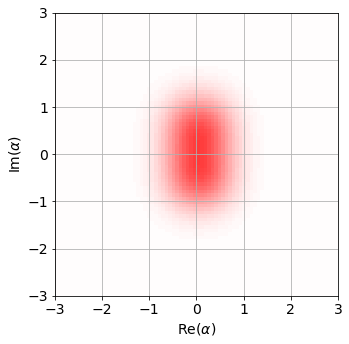

In [14]:

plot_wigner(qt.ptrace(ECD_exp(superpos ,t_displace , t_wait , 4*1.25),1))

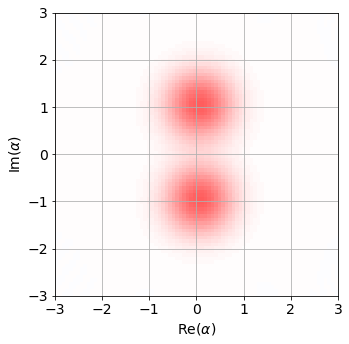

In [15]:
plot_wigner(qt.ptrace(ECD_exp(superpos ,t_displace , t_wait , 2*4*1.25),1))